In [33]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

#### 2D Convolution, Filter và Smoothing

In [34]:
def convolution2D(image, kernel, stride, padding):
    """
    Thực hiện phép tích chập 2D trên ảnh đầu vào sử dụng kernel cho trước.

    Parameters:
        image (ndarray): Mảng 2D đại diện cho ảnh đầu vào.
        kernel (ndarray): Mảng 2D đại diện cho kernel.
        stride (int): Bước nhảy khi thực hiện tích chập.
        padding (int): Số lượng pixel được thêm vào viền ảnh.

    Returns:
        ndarray: Mảng 2D đại diện cho ảnh sau khi áp dụng phép tích chập.

    """
    
    # thêm padding cho ảnh đầu vào
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    # tính toán kích thước của ảnh đầu ra
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # khởi tạo ma trận đầu ra
    new_image = np.zeros((output_height, output_width))

    # tính tích chập
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)
    return new_image.astype(np.int8)

##### Khởi tạo ảnh mẫu

In [35]:
part1 = np.array([[0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
part1 = np.rot90(part1, -1)

part2 = np.array([[0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 0., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 0., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 0., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 0., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 1., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 1., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 1., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 7., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 7., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

part3 = np.rot90(part1, -1)
part4 = np.rot90(part2, 1)

img = np.concatenate((np.concatenate((part1, part3), axis=1), np.concatenate((part2, part4), axis=1)), axis=0)

In [36]:
img = img // 2
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 3., ..., 3., 0., 0.],
       [0., 3., 0., ..., 0., 3., 0.],
       [3., 0., 0., ..., 0., 0., 3.]])

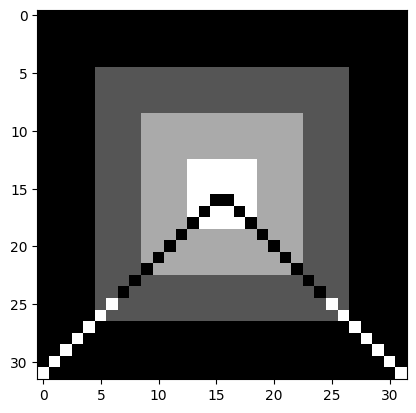

In [37]:
plt.imshow(img, cmap='gray')

##### Khởi tạo kernel

- Gaussian:
$$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

- Median:
$$K_{ij} = \frac{1}{hw}$$

- Bilateral:
$$K(x, y) = \frac{G(x, y) \cdot R(x, y)}{\sum_{i,j} G(i, j) \cdot R(i, j)}$$

In [38]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def median_kernel(size):
    return np.ones((size, size)) / size**2 

def bilateral_kernel(size, sigma_d, sigma_r):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma_d**2)))
    r = np.sqrt(x**2 + y**2)
    out = g * np.exp(-(r**2) / (2.0 * sigma_r**2))
    return out / out.sum()

In [39]:
bilateral_kernel(3, 0.8, 0.8)

array([[0.02181366, 0.10406717, 0.02181366],
       [0.10406717, 0.49647668, 0.10406717],
       [0.02181366, 0.10406717, 0.02181366]])

In [40]:
gaussian_kernel(5, 2)

array([[0.01463746, 0.02129738, 0.02413309, 0.02129738, 0.01463746],
       [0.02129738, 0.0309875 , 0.03511344, 0.0309875 , 0.02129738],
       [0.02413309, 0.03511344, 0.03978874, 0.03511344, 0.02413309],
       [0.02129738, 0.0309875 , 0.03511344, 0.0309875 , 0.02129738],
       [0.01463746, 0.02129738, 0.02413309, 0.02129738, 0.01463746]])

In [41]:
kernel1_a = np.array([[1, 0, -1], 
                      [2, 0, -2], 
                      [1, 0, -1]])
kernel1_b = np.rot90(kernel1_a, 2)

kernel2_a = np.array([[-1, -2, -1], 
                      [0, 0, 0], 
                      [1, 2, 1]])
kernel2_b = np.rot90(kernel2_a, 2)

kernel3_a = np.array([[1, 0, -1], 
                    [0, 2, 0], 
                    [-1, 0, 1]]) 
kernel3_b = np.rot90(kernel3_a, 1)

kernel4_a = np.array([[1, 2, 1], 
                      [2, 4, 2], 
                      [1, 2, 1]])
kernel4_b = gaussian_kernel(3, 0.5) * 16

kernel5_a = np.ones((3, 3)) / 9 + np.array([[0, 0, 0], 
                                            [0, 2, 0], 
                                            [0, 0, 0]])
kernel5_b = np.ones((5, 5)) / 25 + np.array([[0, 0, 0, 0, 0], 
                                             [0, 0, 0, 0, 0],
                                             [0, 0, 2, 0, 0],
                                             [0, 0, 0, 0, 0], 
                                             [0, 0, 0, 0, 0]])
kernel5_c = np.ones((3, 3)) / 9

kernel6 = np.zeros((3, 3))
kernel6[1, 1] = 2
kernel6 -= np.ones((3, 3)) / 9

##### Triển

Đường dọc

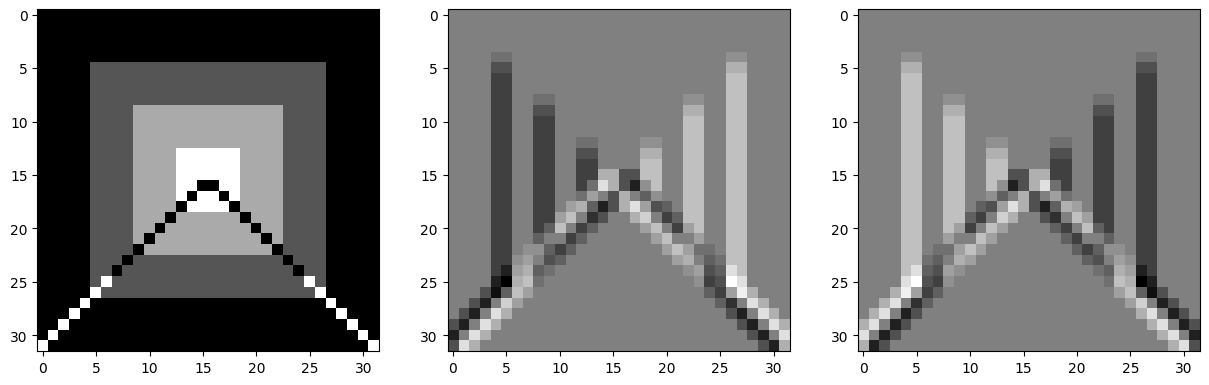

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel1_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel1_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Đường ngang

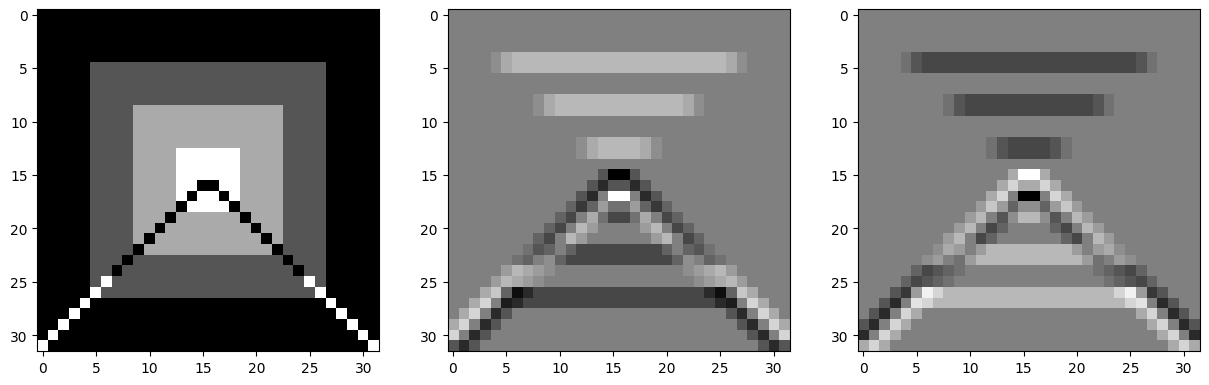

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel2_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel2_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Đường chéo

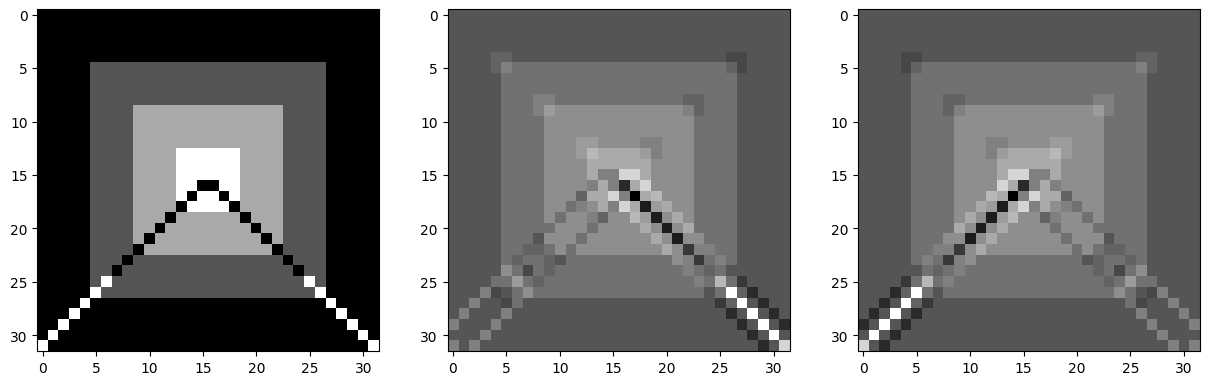

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel3_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel3_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Gaussian Blurring và Sharpening

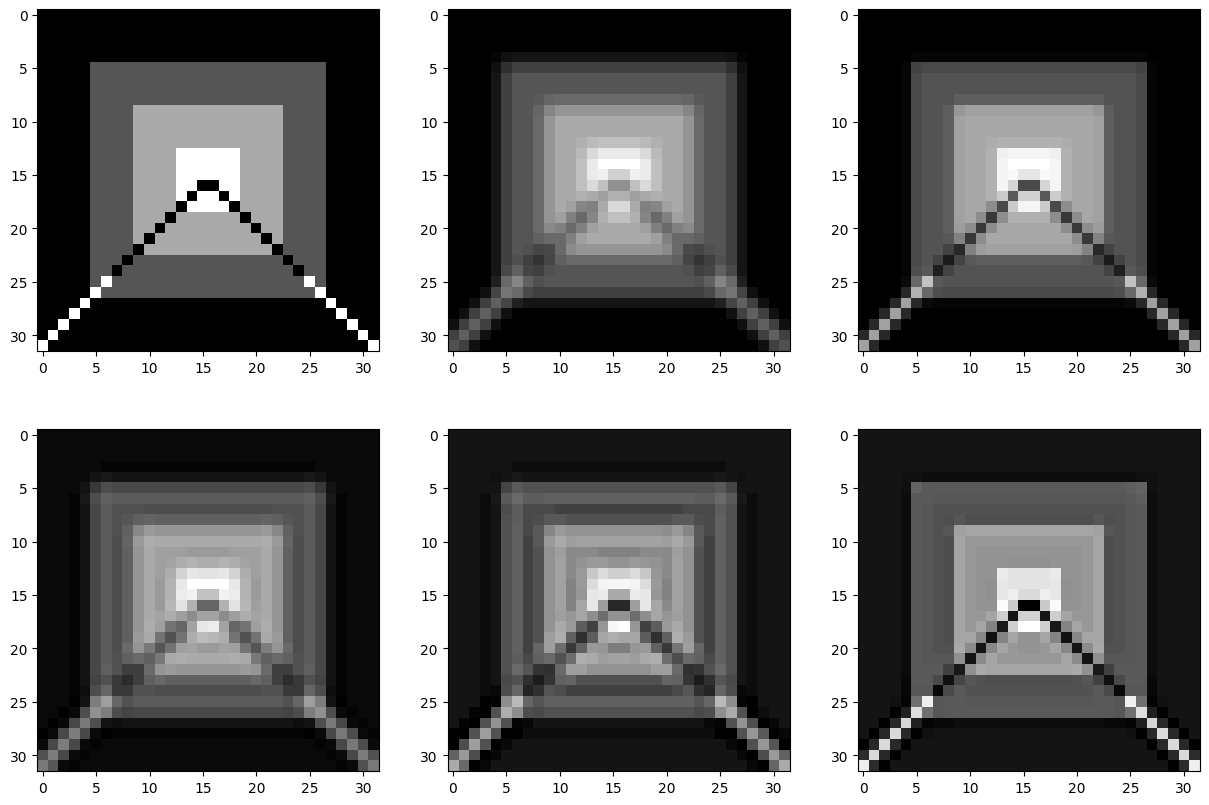

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(2, 3, 2)
conv_img1 = convolution2D(img, kernel4_a, 1, 1)
plt.imshow(conv_img1, cmap='gray')

plt.subplot(2, 3, 3)
conv_img2 = convolution2D(img, kernel4_b, 1, 1)
plt.imshow(conv_img2, cmap='gray')

plt.subplot(2, 3, 4)
sharpen_img = convolution2D(conv_img1, kernel6, 1, 1)
plt.imshow(sharpen_img, cmap='gray')

plt.subplot(2, 3, 5)
sharpen_img = convolution2D(sharpen_img, kernel6, 1, 1)
plt.imshow(sharpen_img, cmap='gray')

plt.subplot(2, 3, 6)
sharpen_img = convolution2D(conv_img2, kernel6, 1, 1)
plt.imshow(sharpen_img, cmap='gray')

Median Blurring và Bilateral Filter

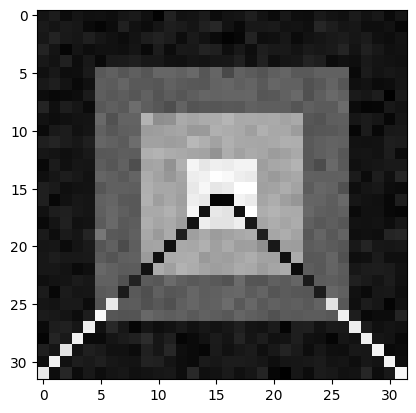

In [46]:
# Thêm noise vào ảnh
noisy_img = img.copy()
noise = np.random.normal(0, 1, img.shape)
noisy_img = noisy_img + 0.1 * noise

plt.imshow(noisy_img, cmap='gray')

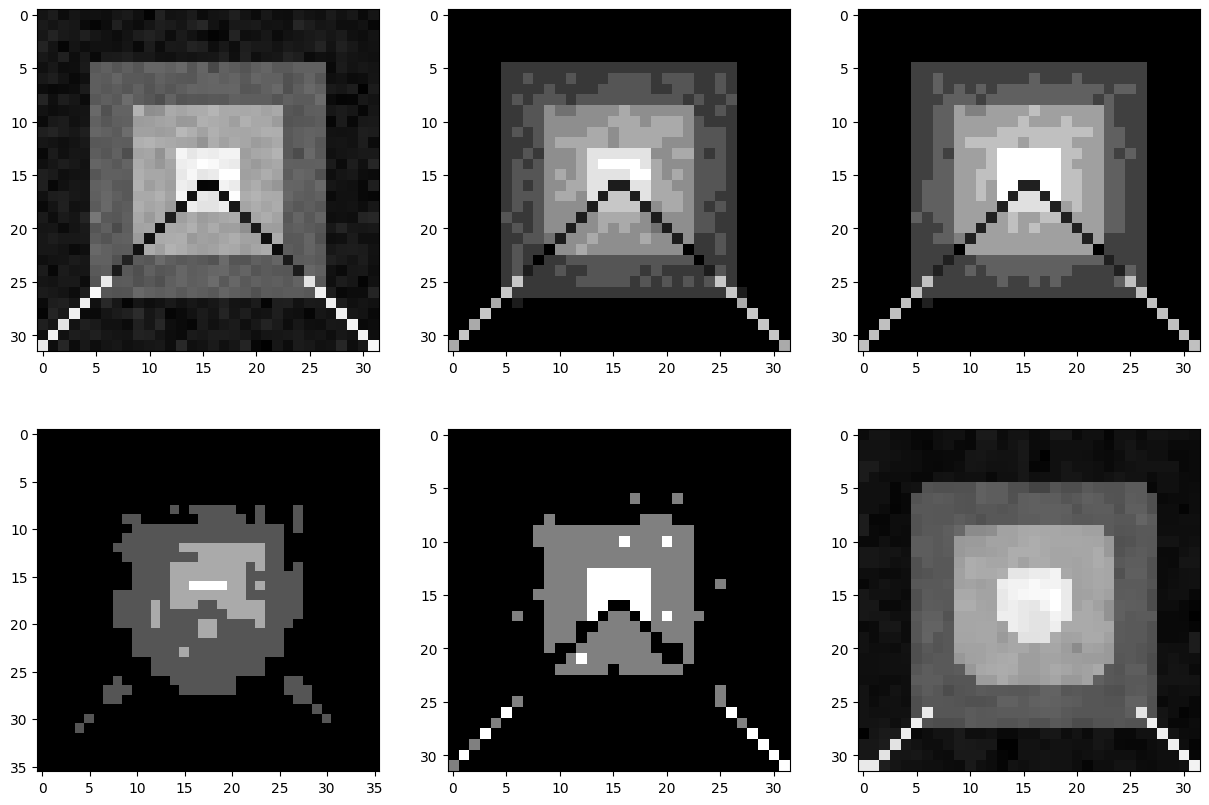

In [47]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(noisy_img, cmap='gray')

plt.subplot(2, 3, 2)
conv_img = convolution2D(noisy_img, kernel5_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 3)
conv_img = convolution2D(noisy_img, kernel5_b, 1, 2)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 4)
conv_img = convolution2D(noisy_img, kernel5_c, 1, 3)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 5)
filtered_img = cv2.bilateralFilter(noisy_img.astype(np.uint8), d=1, sigmaColor=1, sigmaSpace=1)
plt.imshow(filtered_img, cmap='gray')

plt.subplot(2, 3, 6)
filtered_img = median_filter(noisy_img, size=2)
plt.imshow(filtered_img, cmap='gray')

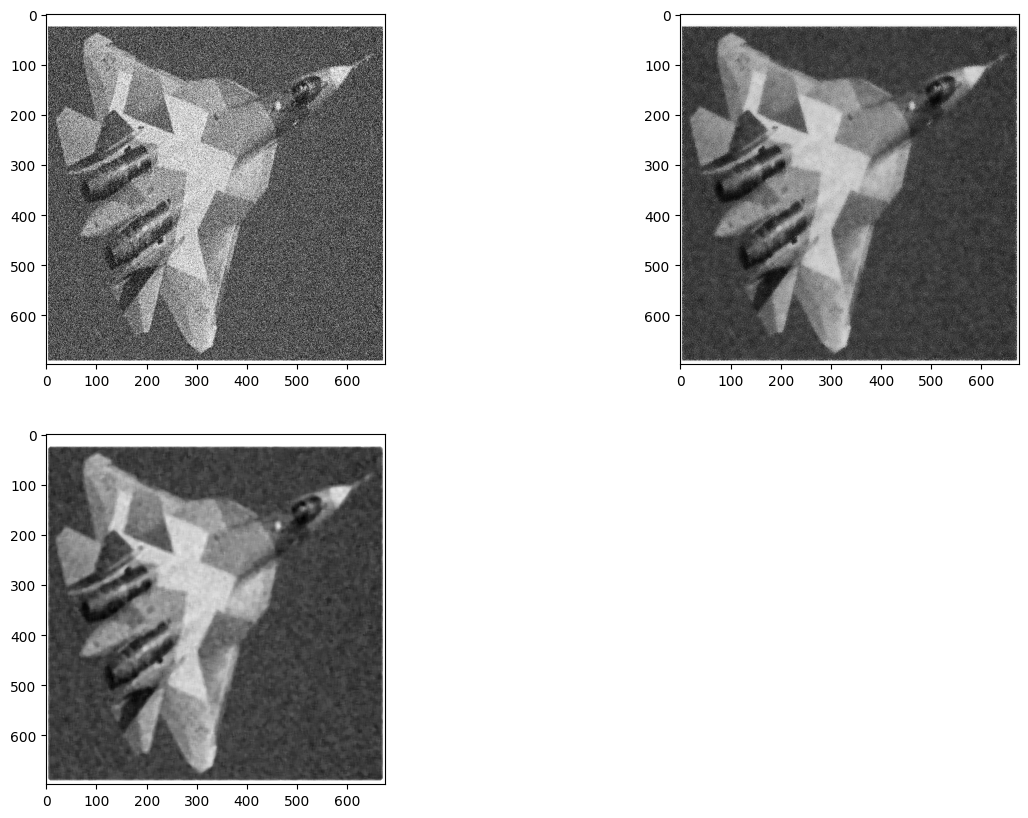

In [48]:
# triển với ảnh nhiễu
plt.figure(figsize=(15, 10))
img = cv2.imread('noise.png', 0)
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
filtered_img = cv2.bilateralFilter(img.astype(np.uint8), d=15, sigmaColor=80, sigmaSpace=80)
plt.imshow(filtered_img, cmap='gray')

plt.subplot(2, 2, 3)
filtered_img = median_filter(img, size=9)
plt.imshow(filtered_img, cmap='gray')

### Edge Detection

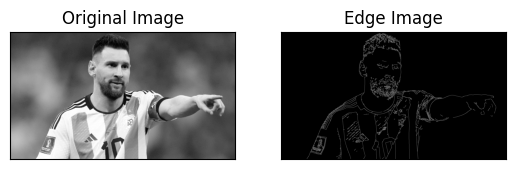

In [49]:
img = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

### Morphological Transformations

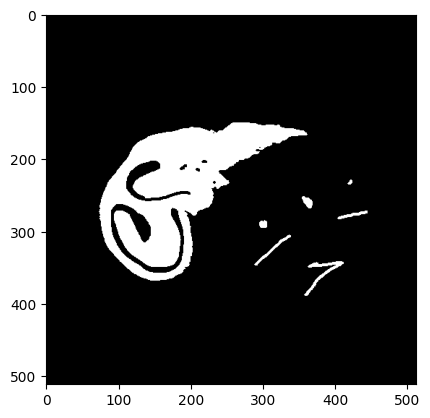

In [50]:
img = cv2.imread('img11.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

Erosion

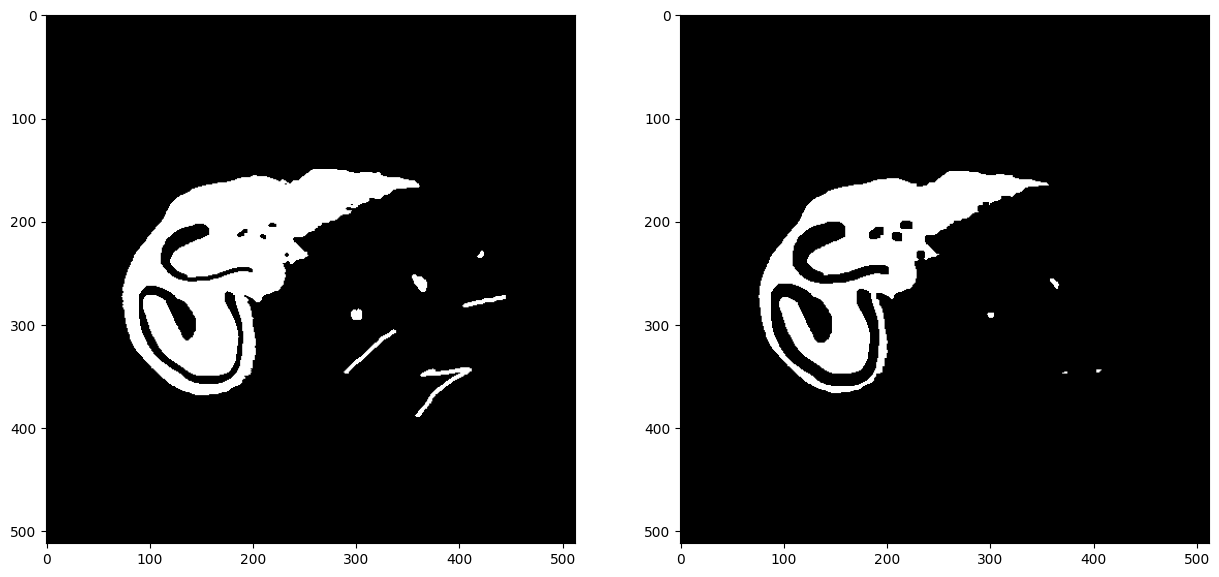

In [51]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(erosion, cmap='gray')

Dilation

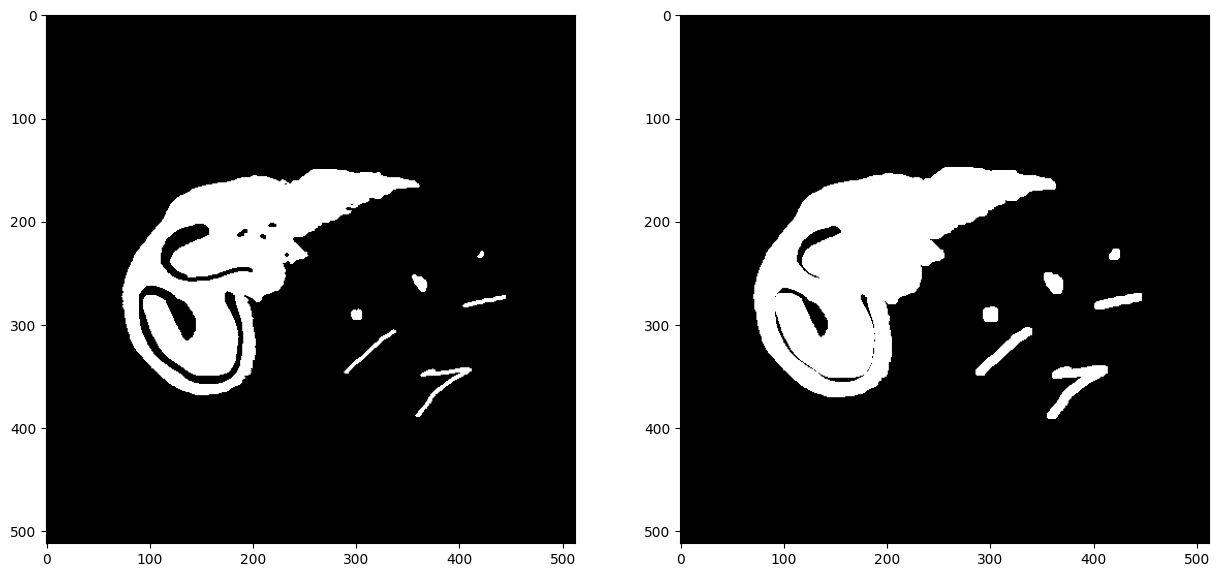

In [52]:
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(dilation, cmap='gray')

Opening

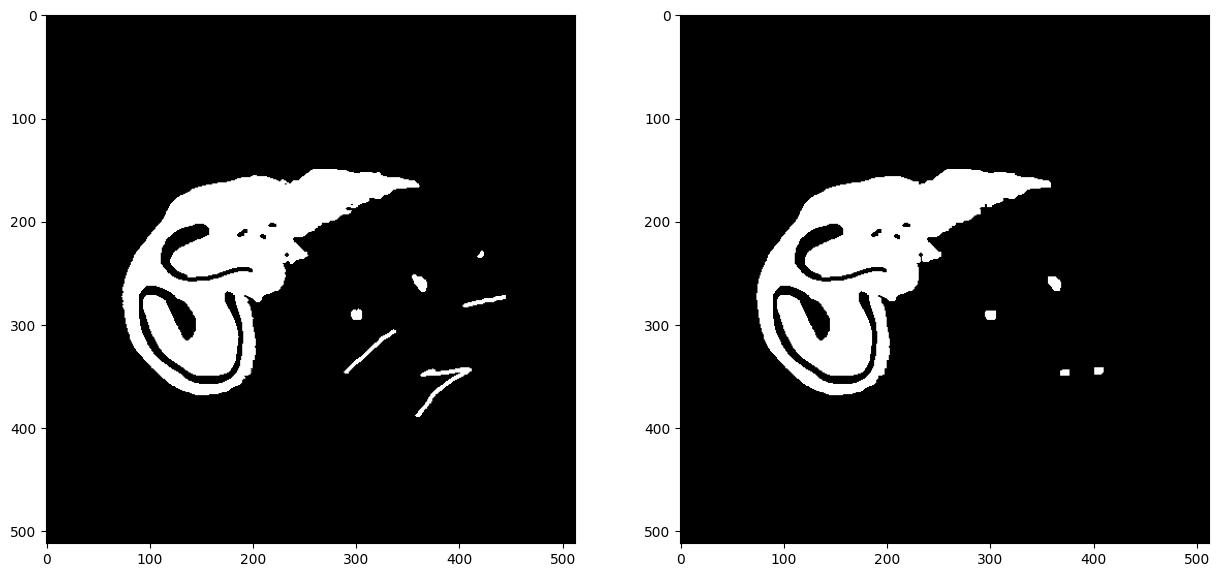

In [53]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(opening, cmap='gray')

Closing

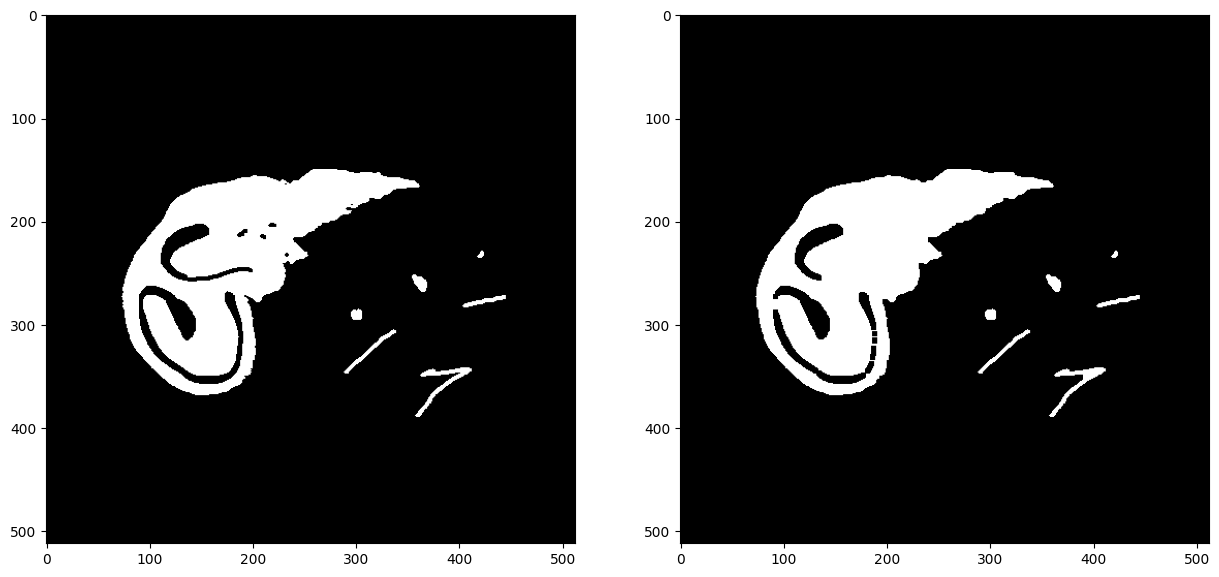

In [54]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(closing, cmap='gray')

Morphological Gradient

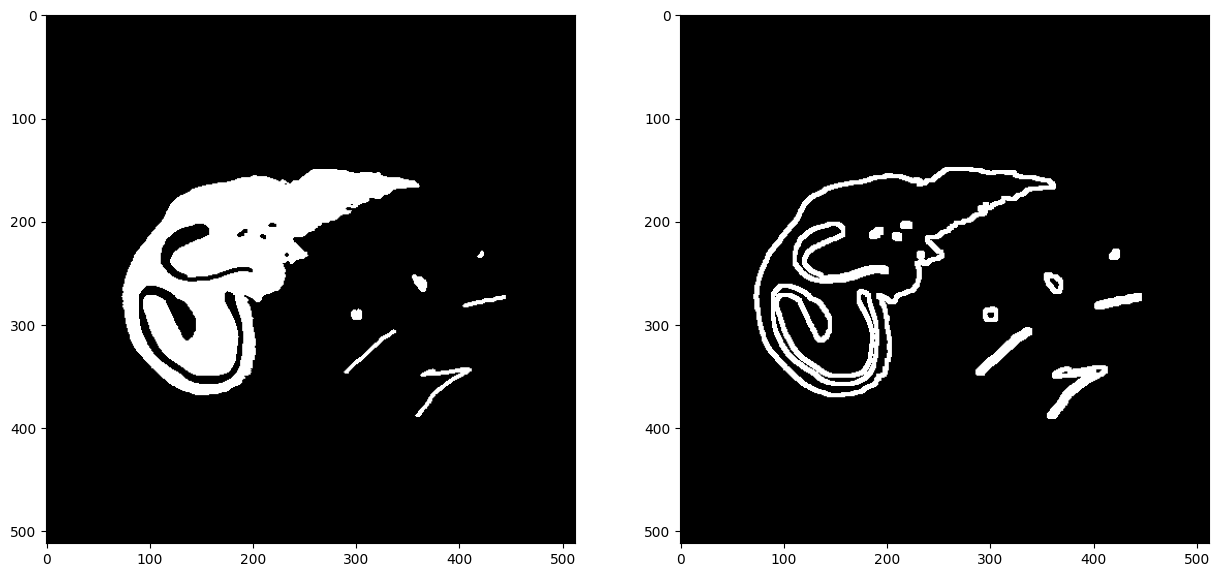

In [55]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(gradient, cmap='gray')

Top Hat

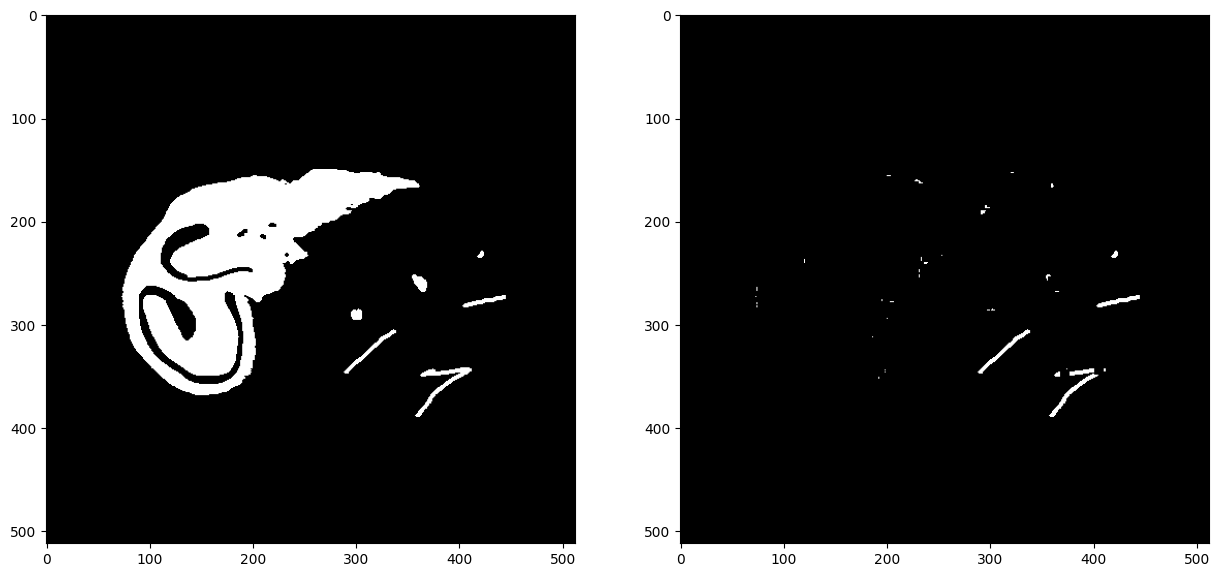

In [56]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(tophat, cmap='gray')

Black Hat

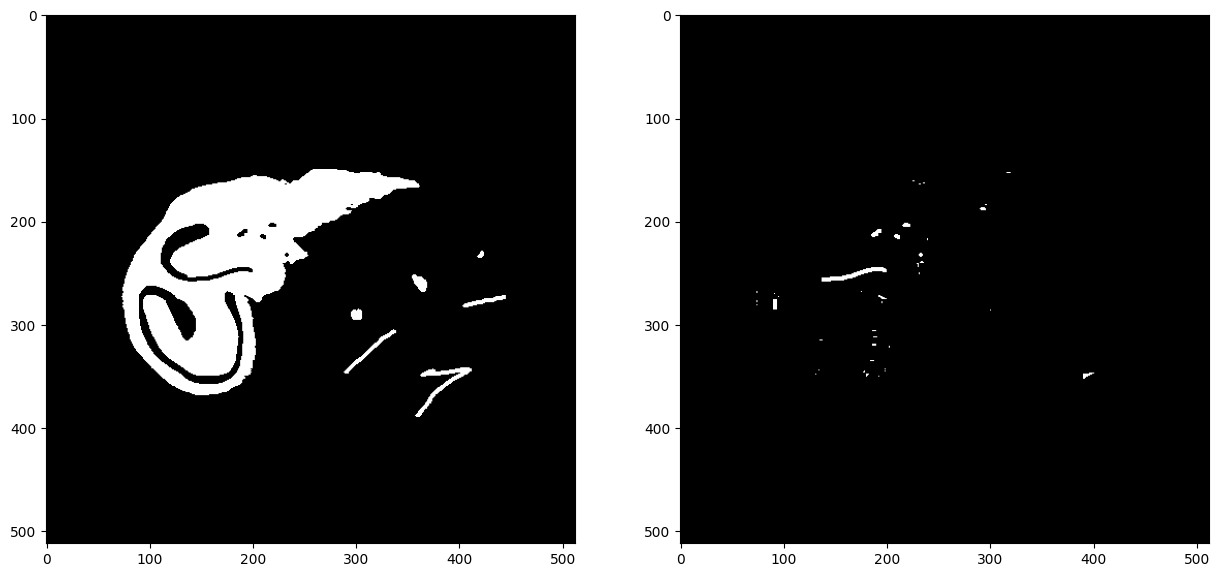

In [57]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(blackhat, cmap='gray')